In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1.

The probability of rolling snake eyes is less than that of rolling sevens.

Probability of rolling snake eyes:

$P(v) = \prod_{i}^{N} P_i(v)$

where v = 1, and N = 2.

$P(1) = \frac{1}{36}$

Probability of rolling sevens:

$P_{A+B}(x) = \sum_{z} P_A(z)P_B(x-z)$

where x = 7, and z = 6.

$P_{A+B}(7) = \frac{6}{36} = \frac{1}{6}$

In [7]:
_P = 36 * 6
print(_P)

216


The ratio: $\frac{P(1)}{P_{A+B}(7)} = \frac{1}{216}$

## 2.

Finding the probabilities analytically:

<table>
    \begin{array}{|c|c|}
        \hline
        \textbf{Sum} & \textbf{Options}\\
        \hline
        2 & 1 1\\
        3 & 1 2, 2 1\\
        4 & 1 3, 2 2, 3 1\\
        5 & 1 4, 2 3, 3 2, 4 1\\
        6 & 1 5, 2 4, 3 3, 4 2, 5 1\\
        7 & 1 6, 2 5, 3 4, 4 3, 5 2, 6 1\\
        8 & 2 6, 3 5, 4 4, 5 3, 6 2\\
        9 & 3 6, 4 5, 5 4, 6 3\\
        10 & 4 6, 5 5, 6 4\\
        11 & 5 6, 6 5\\
        12 & 6 6\\
        \hline
    \end{array}
</table>

<table>
    \begin{array}{|c|c|}
        \hline
        \textbf{Sum} & \textbf{Probability}\\
        \hline
        2 & \frac{1}{36}\\
        3 & \frac{2}{36}\\
        4 & \frac{3}{36}\\
        5 & \frac{4}{36}\\
        6 & \frac{5}{36}\\
        7 & \frac{6}{36}\\
        8 & \frac{5}{36}\\
        9 & \frac{4}{36}\\
        10 & \frac{3}{36}\\
        11 & \frac{2}{36}\\
        12 & \frac{1}{36}\\
        \hline
    \end{array}
<table>

Finding probabilities numerically:

In [7]:
pdf = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [8]:
pdf_sum = np.convolve(pdf, pdf, mode='full')
print(pdf_sum)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


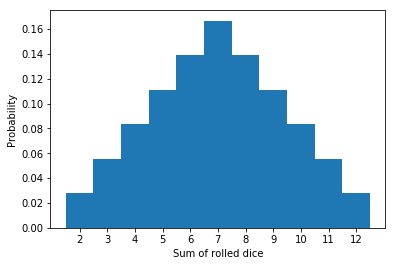

In [9]:
plt.figure()
x = np.arange(2, 13, 1)
plt.bar(x, pdf_sum, width=1)
plt.xticks(x)
plt.xlabel('Sum of rolled dice')
plt.ylabel('Probability')
plt.show()

## 3.

Formula for mean: $\sum_i x_iP_i$, assuming that the total probabiltiy is 1.

In [10]:
mean = sum(x * pdf_sum) #/ sum(pdf_sum)
print('The mean of the convolution distribution: ' + str(mean))

The mean of the convolution distribution: 7.0


Formula for variance: $\sum_i(x_i-mean)^2P_i$

In [11]:
var = sum((x - mean)**2 * pdf_sum)
print('The variance of the convolution distribution: ' + str(var))

The variance of the convolution distribution: 5.833333333333334


## 4. 

Convolving the pdf of the dice 9 times to get an average of throwing 10 dice:

In [12]:
def multi_dice_pdf(number_conv):
    for i in range(0, number_conv):
        if i == 0:
            new_pdf = pdf
        else:
            new_pdf = convolved_pdf
        convolved_pdf = np.convolve(pdf, new_pdf)
    return convolved_pdf

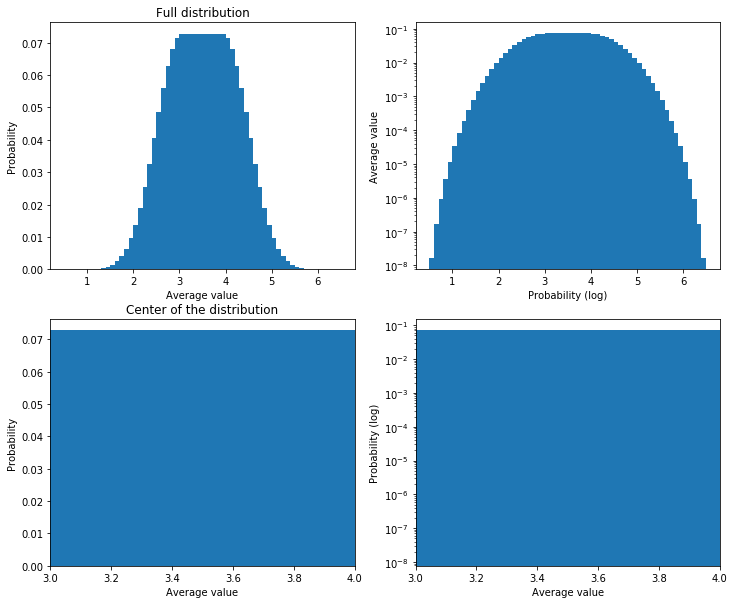

In [21]:
n = 10
averages = np.arange(n, 6*n+1)/n
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0][0].set_title('Full distribution')
ax[0][0].bar(averages, multi_dice_pdf(9), width=1)
ax[0][0].set_xlabel('Average value')
ax[0][0].set_ylabel('Probability')
ax[0][1].bar(averages, multi_dice_pdf(9), width=1)
ax[0][1].set_xlabel('Probability (log)')
ax[0][1].set_ylabel('Average value')
ax[0][1].set_yscale('log')
ax[1][0].set_title('Center of the distribution')
ax[1][0].bar(averages, multi_dice_pdf(9), width=1)
ax[1][0].set_xlabel('Average value')
ax[1][0].set_ylabel('Probability')
ax[1][0].set_xlim(3, 4)
ax[1][1].bar(averages, multi_dice_pdf(9), width=1)
ax[1][1].set_xlabel('Average value')
ax[1][1].set_ylabel('Probability (log)')
ax[1][1].set_yscale('log')
ax[1][1].set_xlim(3, 4)
plt.show()